# **IMPORT NECESSARY LIBRARIES**

In [1]:
# Import Libraries

import pandas as pd
from CBFV import composition
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# **LOAD DATASETS**

In [2]:
# Load chemical_formulas

matpedia = pd.read_csv('../../data/d1_data_extraction/2Dmatpedia.csv')
c2db = pd.read_csv('../../data/d1_data_extraction/c2db.csv')
mc3d = pd.read_csv('../../data/d1_data_extraction/mc3d.csv')
c1db = pd.read_csv('../../data/d1_data_extraction/c1db.csv')
formulas = pd.read_csv('../../data/d3_validity_check/formulas.csv')

C:\Users\aaayu\AppData\Local\Temp\ipykernel_21508\4262069811.py:4: DtypeWarning: Columns (149) have mixed types. Specify dtype option on import or set low_memory=False.
  c2db = pd.read_csv('../../data/d1_data_extraction/c2db.csv')


# **PREPARING KNOWN 2D FORMULAS**



*   **2DMATPEDIA**




In [3]:
# Extracting Required Columns

matpedia = matpedia[['Formula']]
matpedia.head()

,Formula
0,O2
1,C3N
2,GaN
3,LiB
4,Ga


In [4]:
# Handling Missing Values

matpedia.isna().sum()

Formula    0
dtype: int64

In [5]:
# Handling Duplicates

print("Shape Before Remvoing Duplicates: ", matpedia.shape)

# Checking Duplicates before removing
duplicate_formulas = matpedia[matpedia['Formula'].duplicated(keep=False)]

if not duplicate_formulas.empty:
    print("Duplicate formulas found:")
    print(duplicate_formulas)
else:
    print("No duplicate formulas found.")


# Removing Duplicates
known_2D_1 = matpedia.drop_duplicates(subset='Formula', keep='first')

print("Duplicate formulas removed:")
print(known_2D_1)


# Checking Duplicates after removing
duplicate_formulas = known_2D_1[known_2D_1['Formula'].duplicated(keep=False)]

if not duplicate_formulas.empty:
    print("Duplicate formulas found:")
    print(duplicate_formulas)
else:
    print("No duplicate formulas found.")


# Checking Shape after removing
print("Shape After removing Duplicates: ", known_2D_1.shape)


Shape Before Remvoing Duplicates:  (6349, 1)
Duplicate formulas found:
     Formula
1        C3N
2        GaN
4         Ga
5     Sb2Te3
8       LiMg
...      ...
6335   TaBr4
6337     GaP
6338   AuCl2
6341   SbBr3
6346    WBr2

[3004 rows x 1 columns]
Duplicate formulas removed:
     Formula
0         O2
1        C3N
2        GaN
3        LiB
4         Ga
...      ...
6343   GeCl3
6344     B2O
6345   Ga3Co
6347    MgAg
6348    SiI3

[4378 rows x 1 columns]
No duplicate formulas found.
Shape After removing Duplicates:  (4378, 1)




*   **C2DB**




In [6]:
# Remove non-2d materials
c2db = c2db[c2db['dim_nclusters_2D'] == 1]
c2db.shape

(14264, 168)

In [7]:
# Extracting Required Columns

c2db = c2db[['Formula']]
c2db

,Formula
0,Ga4
1,Br2Sn2O3
2,I2O2Au3
3,Nb2Br3S3
4,Br2Nb3Se5
...,...
15728,P2Rh2S6
15729,P2Ta2Se6
15730,P2Zr2Se6
15731,Mo2W2Se8


In [8]:
# Handling Missing Values

c2db.isna().sum()

Formula    0
dtype: int64

In [9]:
# Handling Duplicates

print("Shape Before Remvoing Duplicates: ", c2db.shape)

# Checking Duplicates before removing
duplicate_formulas = c2db[c2db['Formula'].duplicated(keep=False)]

if not duplicate_formulas.empty:
    print("Duplicate formulas found:")
    print(duplicate_formulas)
else:
    print("No duplicate formulas found.")


# Removing Duplicates
known_2D_2 = c2db.drop_duplicates(subset='Formula', keep='first')

print("Duplicate formulas removed:")
print(known_2D_2)


# Checking Duplicates after removing
duplicate_formulas = known_2D_2[known_2D_2['Formula'].duplicated(keep=False)]

if not duplicate_formulas.empty:
    print("Duplicate formulas found:")
    print(duplicate_formulas)
else:
    print("No duplicate formulas found.")


# Checking Shape after removing
print("Shape After removing Duplicates: ", known_2D_2.shape)


Shape Before Remvoing Duplicates:  (14264, 1)
Duplicate formulas found:
          Formula
44       Cl2N2Nb2
206    B2F2Se2Ti3
209    C2H2Te2Ti3
210    F2N2Se2Ti3
240      Al2Fe2S5
...           ...
15721      SeTeTi
15725     Cr2P2S6
15728     P2Rh2S6
15729    P2Ta2Se6
15730    P2Zr2Se6

[3240 rows x 1 columns]
Duplicate formulas removed:
         Formula
0            Ga4
1       Br2Sn2O3
2        I2O2Au3
3       Nb2Br3S3
4      Br2Nb3Se5
...          ...
15723    Co2H2O4
15724    Al2P2S6
15727    Ni2P2S6
15731   Mo2W2Se8
15732     FeZrI6

[12316 rows x 1 columns]
No duplicate formulas found.
Shape After removing Duplicates:  (12316, 1)




*   **KNOWN 2D FORMULAS**




In [10]:
# Concatenate the known_2D_1 with the known_2D_2
known_2D = pd.concat([known_2D_1, known_2D_2], ignore_index=True)
indices_to_drop = known_2D[known_2D['Formula'].isin(['2-Feb', '3-Feb', '4-Feb'])].index
known_2D.drop(indices_to_drop, inplace=True)

In [11]:
known_2D.shape

(16691, 1)

# **PREPARING KNOWN NON-2D FORMULAS**



*   **C1DB**




In [12]:
# Extracting Required Columns

c1db = c1db[['Formula']]
c1db.head()

,Formula
0,ZrSe4Hf5Br10
1,SiSnTiHf2S3I4Br6
2,Cl2P2Se2
3,SSiMo2Cl8
4,VZrI6


In [13]:
# Handling Missing Values

c1db.isna().sum()

Formula    0
dtype: int64

In [14]:
# Handling Duplicates

print("Shape Before Remvoing Duplicates: ", c1db.shape)

# Checking Duplicates before removing
duplicate_formulas = c1db[c1db['Formula'].duplicated(keep=False)]

if not duplicate_formulas.empty:
    print("Duplicate formulas found:")
    print(duplicate_formulas)
else:
    print("No duplicate formulas found.")


# Removing Duplicates
known_non2D_1 = c1db.drop_duplicates(subset='Formula', keep='first')

print("Duplicate formulas removed:")
print(known_non2D_1)


# Checking Duplicates after removing
duplicate_formulas = known_non2D_1[known_non2D_1['Formula'].duplicated(keep=False)]

if not duplicate_formulas.empty:
    print("Duplicate formulas found:")
    print(duplicate_formulas)
else:
    print("No duplicate formulas found.")


# Checking Shape after removing
print("Shape After removing Duplicates: ", known_non2D_1.shape)


Shape Before Remvoing Duplicates:  (3152, 1)
Duplicate formulas found:
        Formula
2      Cl2P2Se2
61     OsVS2Br5
133       S2Ag4
135      As4Te6
136      Be2Br4
...         ...
3147      NW2I8
3148  Mo4N4Br12
3149   Mo4N4I12
3150   N4W4Br12
3151    N4W4I12

[1850 rows x 1 columns]
Duplicate formulas removed:
               Formula
0         ZrSe4Hf5Br10
1     SiSnTiHf2S3I4Br6
2             Cl2P2Se2
3            SSiMo2Cl8
4                VZrI6
...                ...
3127         Ta4Br8Cl8
3130        Ge4Ti4Se12
3133        Si4Ti4Te12
3136        Si4Ti4Se24
3142           Mo2O2I8

[2111 rows x 1 columns]
No duplicate formulas found.
Shape After removing Duplicates:  (2111, 1)




*   **MC3D**



In [15]:
# Extracting Required Columns

mc3d.rename(columns={'formula': 'Formula'}, inplace=True)
mc3d = mc3d[['Formula']]
mc3d.head()

,Formula
0,Ge26Ir8Y6
1,FeSbV
2,C4Ba2N4S4
3,Ag4F28Ru4
4,Rh4Sn16


In [16]:
# Handling Missing Values

mc3d.isna().sum()

Formula    0
dtype: int64

In [17]:
# Handling Duplicates

print("Shape Before Remvoing Duplicates: ", mc3d.shape)

# Checking Duplicates before removing
duplicate_formulas = mc3d[mc3d['Formula'].duplicated(keep=False)]

if not duplicate_formulas.empty:
    print("Duplicate formulas found:")
    print(duplicate_formulas)
else:
    print("No duplicate formulas found.")


# Removing Duplicates
known_non2D_2 = mc3d.drop_duplicates(subset='Formula', keep='first')

print("Duplicate formulas removed:")
print(known_non2D_2)


# Checking Duplicates after removing
duplicate_formulas = known_non2D_2[known_non2D_2['Formula'].duplicated(keep=False)]

if not duplicate_formulas.empty:
    print("Duplicate formulas found:")
    print(duplicate_formulas)
else:
    print("No duplicate formulas found.")


# Checking Shape after removing
print("Shape After removing Duplicates: ", known_non2D_2.shape)

Shape Before Remvoing Duplicates:  (34487, 1)
Duplicate formulas found:
            Formula
1             FeSbV
2         C4Ba2N4S4
15     B14Cl2Mg6O26
32         Au2F8Li2
37        Mo6Se6Tl2
...             ...
34470     Cs2H4O8P2
34480     O24Pb12W4
34482     Bi4Nb4O16
34484           Ca4
34485     Cu2FeS4Sn

[5203 rows x 1 columns]
Duplicate formulas removed:
                Formula
0             Ge26Ir8Y6
1                 FeSbV
2             C4Ba2N4S4
3             Ag4F28Ru4
4               Rh4Sn16
...                 ...
34478            F24Tb6
34479       K4O42S12Sn2
34481            As6Mo4
34483      Cr4Mg4O24Si8
34486  Ca2H4Mn4Na2O24P6

[31464 rows x 1 columns]
No duplicate formulas found.
Shape After removing Duplicates:  (31464, 1)




*   **KNOWN NON 2D FORMULAS**




In [18]:
# Concatenate the known_2D_1 with the known_2D_2
known_non2D = pd.concat([known_non2D_1, known_non2D_2], ignore_index=True)
indices_to_drop = known_non2D[known_non2D['Formula'].isin(['2-Feb', '3-Feb', '4-Feb'])].index
known_non2D.drop(indices_to_drop, inplace=True)

In [19]:
known_non2D.shape

(33575, 1)

# **PREPARING TRAINING DATA**

In [20]:
# Rename Columns

known_2D.rename(columns={'Formula': 'formula'}, inplace=True)
known_non2D.rename(columns={'Formula': 'formula'}, inplace=True)

# Add labels
known_2D['target'] = 1
known_non2D['target'] = 0

In [21]:
desired_non2D_count = int(1.5 * known_2D.shape[0])

In [22]:
# Randomly sample from non-2D samples to match the desired count
oversampled_known_non2D = known_non2D.sample(n=desired_non2D_count, replace=True, random_state=42)

In [23]:
# Concatenate the oversampled positive samples with the original negative samples
training_data = pd.concat([oversampled_known_non2D, known_2D], ignore_index=True)
indices_to_drop = training_data[training_data['formula'].isin(['2-Feb', '3-Feb', '4-Feb'])].index
training_data.drop(indices_to_drop, inplace=True)

In [24]:
# Shuffle the data to mix positive and negative samples
training_data = training_data.sample(frac=1, random_state=42).reset_index(drop=True)
print("KNOWN 2D Shape: ", known_2D.shape)
print("KNOWN NON 2D Shape: ", oversampled_known_non2D.shape)
print("Training Data Shape: ", training_data.shape)

KNOWN 2D Shape:  (16691, 2)
KNOWN NON 2D Shape:  (25036, 2)
Training Data Shape:  (41727, 2)


In [25]:
training_data.head()

,formula,target
0,Pt12Zr4,0
1,Br12Sn6,0
2,Co4Mo4P4,0
3,F2Sc2Se2,1
4,Ge8Ti4,0


# **PREPARING VALID FORMULAS**

In [26]:
formulas['target'] = 0

In [27]:
# Rename Valid_Formulas

formulas.rename(columns={'Formula': 'formula'}, inplace=True)

In [28]:
formulas

,formula,target
0,TmFe2V5,0
1,Zr5W7C8,0
2,Rb2,0
3,Rb5,0
4,Bi2As4Os5Ac5,0
...,...,...
17944,F2Mn2Po2No3Na8,0
17945,SmZr3P6,0
17946,SrNi4Bi6I8,0
17947,Cu5Mo6Se7,0


In [29]:
# Save all data in csv file

known_2D.to_csv("../../data/d4_screening_2D_materials/known_2D.csv", index=False)
oversampled_known_non2D.to_csv("../../data/d4_screening_2D_materials/known_non2D.csv", index=False)
training_data.to_csv("../../data/d4_screening_2D_materials/training_data.csv", index=False)

# **FEATURIZATION**

In [30]:
# Featurizing

X_train_unscaled, y_train, _, _ = composition.generate_features(training_data, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, _, _, _ = composition.generate_features(formulas, elem_prop='magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

Processing Input Data: 100%|██████████| 41727/41727 [00:01<00:00, 22803.65it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 41727/41727 [00:04<00:00, 10349.32it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 17949/17949 [00:00<00:00, 19344.49it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 17949/17949 [00:01<00:00, 10224.70it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


In [31]:
# Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.fit_transform(X_test_unscaled)
# Normalizing the Data
X_train = normalize(X_train)
X_test = normalize(X_test)

# **MODEL TRAINING**

In [32]:
# Initialize and train the model
rf = RandomForestClassifier(max_depth=10, n_estimators=250, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

In [33]:
print(f'Cross-validation accuracy: {cv_scores.mean()}')

Cross-validation accuracy: 0.8953432891305312


In [34]:
# Fit the model on the full training set
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=250, random_state=42)

In [35]:
# Function to predict metal or not

def predict_2D(formula, classifier):
    # Generate features for the formula
    input = pd.DataFrame({'formula': [formula], 'target': [0]})
    features, _, _, _ = composition.generate_features(input, elem_prop='magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

    # Scale and normalize the features
    features_scaled = scaler.transform(features)
    features_normalized = normalize(features_scaled)

    # Predict using the classifier
    prediction = classifier.predict(features_normalized)

    # Map the prediction to the corresponding label
    prediction_label = '2D Formula' if prediction[0] == 1 else 'Non-2D Formula'

    # Print the Prediction
    print(f"Formula = {formula}, Prediction = {prediction_label}")



In [36]:
# Print predictions for a particular Formula using Random Forest classifier
formula = 'IrI2Ta5'
prediction_rf = predict_2D(formula, rf)

Processing Input Data: 100%|██████████| 1/1 [00:00<00:00, 193.15it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1/1 [00:00<00:00, 1001.98it/s]

	Creating Pandas Objects...
Formula = IrI2Ta5, Prediction = 2D Formula


In [42]:
# Print predictions for a particular Formula using Random Forest classifier
formula = 'Nb3Cu4Si6'
prediction_rf = predict_2D(formula, rf)

Processing Input Data: 100%|██████████| 1/1 [00:00<00:00, 977.01it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1/1 [00:00<?, ?it/s]

	Creating Pandas Objects...
Formula = Nb3Cu4Si6, Prediction = Non-2D Formula


In [41]:
# Print predictions for a particular Formula using Random Forest classifier
formula = 'PoSe2'
prediction_rf = predict_2D(formula, rf)

Processing Input Data: 100%|██████████| 1/1 [00:00<00:00, 730.33it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1/1 [00:00<?, ?it/s]

	Creating Pandas Objects...
Formula = PoSe2, Prediction = 2D Formula


In [35]:
# Predict the probability scores
probabilities = rf.predict_proba(X_test)[:, 1]

In [36]:
formulas

,formula,target
0,TmFe2V5,0
1,Zr5W7C8,0
2,Rb2,0
3,Rb5,0
4,Bi2As4Os5Ac5,0
...,...,...
17944,F2Mn2Po2No3Na8,0
17945,SmZr3P6,0
17946,SrNi4Bi6I8,0
17947,Cu5Mo6Se7,0


In [37]:
# Add the probabilities to the original dataframe
formulas = formulas.drop(['target'], axis=1)
formulas['2D_probability'] = probabilities


In [38]:
# Save the probabilities of valid formulas
formulas.to_csv('../../data/d4_screening_2D_materials/valid_Formulas_prob.csv', index=False)

In [39]:
# Filter formulas with high probability of being 2D
threshold = 0.7  # Adjust threshold as needed
valid_2d_formulas = formulas[formulas['2D_probability'] > threshold]

In [40]:
valid_2d_formulas.shape

(1492, 2)

In [41]:
# Save the valid 2D formulas
valid_2d_formulas.to_csv('../../data/d4_screening_2D_materials/valid2D_Formulas.csv', index=False)

In [42]:
valid_2d_formulas

,formula,2D_probability
15,S3,0.795150
19,Kr,0.757073
25,I2Nd2Ta3At3,0.742599
30,P6,0.737882
35,At5,0.714678
...,...,...
17907,C2Fe2Se3,0.828354
17908,TbF2Pd2Ta2,0.854095
17910,B2Se3,0.827179
17925,RnPt6,0.779697


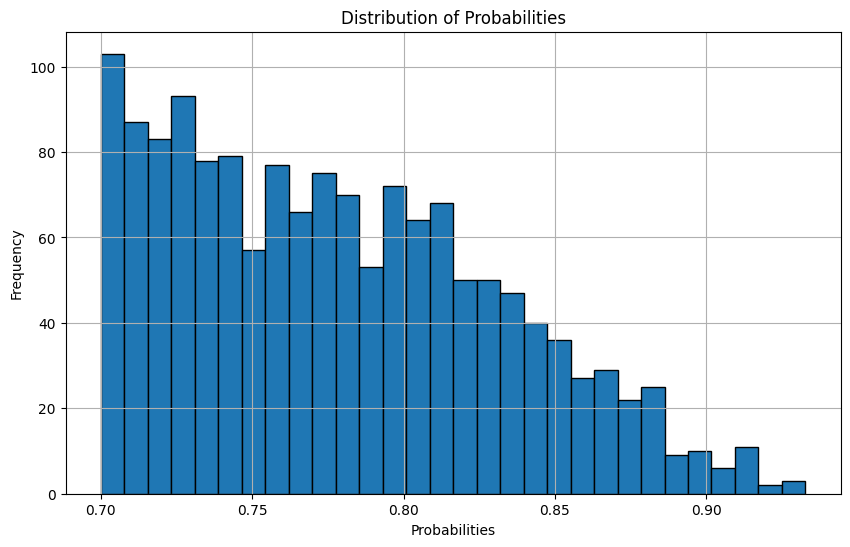

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns named 'Formula' and 'probabilities'
# Replace 'valid_2d_formulas' with the actual name of your DataFrame

# Plotting histogram of probabilities
plt.figure(figsize=(10, 6))
plt.hist(valid_2d_formulas['2D_probability'], bins=30, edgecolor='black')
plt.xlabel('Probabilities')
plt.ylabel('Frequency')
plt.title('Distribution of Probabilities')
plt.grid(True)
plt.show()


In [48]:
top_formulas = valid_2d_formulas.nlargest(10, '2D_probability')

In [49]:
top_formulas

,formula,2D_probability
15061,XeBiRe3,0.932754
9106,FeNiWCl2Ag2,0.927680
5516,RhBr3Re6,0.925749
927,Cl2Os5,0.924434
13318,IrI2Ta5,0.919987
13862,CrI,0.915075
13860,I2Mn5,0.914463
4471,I3Tc5,0.914414
10163,CdTaCl3Mo4,0.913819
9562,FKrNb,0.912111


In [50]:
top_formulas.to_csv('../../data/d4_screening_2D_materials/top_10.csv', index=False)

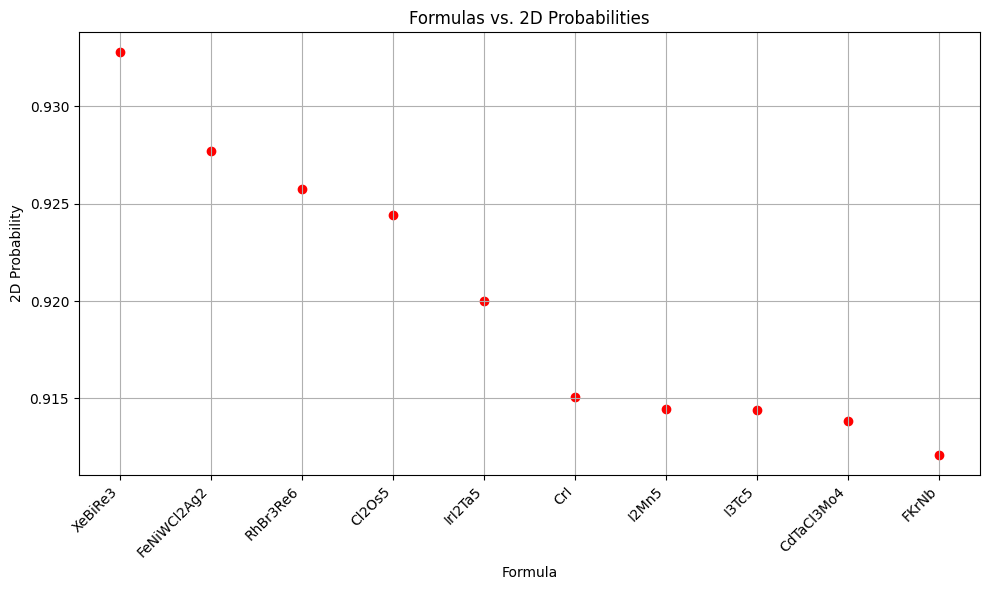

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting scatter plot of formulas vs. 2D probabilities
plt.figure(figsize=(10, 6))
plt.scatter(top_formulas['formula'], top_formulas['2D_probability'], color='red')
plt.xlabel('Formula')
plt.ylabel('2D Probability')
plt.title('Formulas vs. 2D Probabilities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()
